# One dimension discrepancy model

## First approach: iterative sampling

In [225]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%reload_ext autoreload

Module `rain.one_dimension` is for random sampling on interval [0, 1]:

In [253]:
import rain.one_dimension as r1d

## Preliminaries 

`unif_pieces` function defines a probability density function on interval [0, 1] made of union of small sub-intervals given their centers and a unique radius for all sub-intervals
Examples: 
- `unif_pieces(x, centroids=[0.5], r=0.2)` defines a uniform density on interval [0.3, 0.7] (centered on 0.5, with radius 0.2)
- `plot_density(density, size)` plots the **unormalized** given density (argment `size` if for figure size).

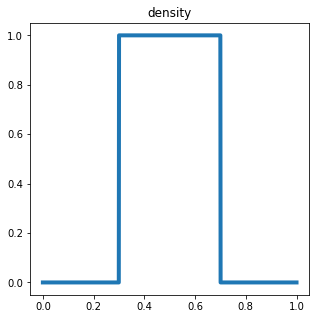

In [210]:
r1d.plot_density(lambda x: r1d.unif_pieces(x, centroids=[0.5], r=0.2), size=5)

Example with two non overlaped intervals:

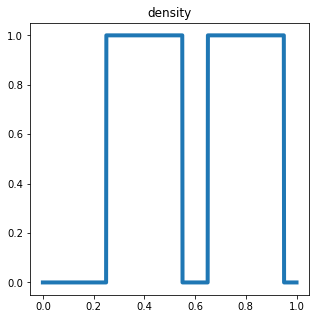

In [211]:
r1d.plot_density(lambda x: r1d.unif_pieces(x, centroids=[0.4, 0.8], r=0.15), size=5)

Example with two overlaped intervals:

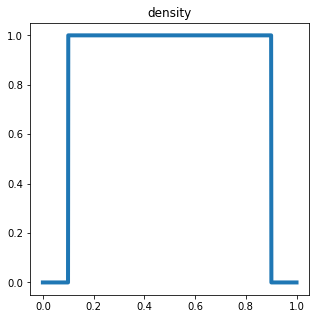

In [212]:
r1d.plot_density(lambda x: r1d.unif_pieces(x, centroids=[0.4, 0.6], r=0.3), size=5)

Similarly, `density_drops` defines the probability density for next drop sampling given previous drops (centroids) on interval [0, 1]. Parameter `fill` is the fraction of interval [0, 1] correponding to zero density, i.e. where **no** drops can fall.  
Note that in comparison to `unif_pieces`, the past drops (centroids) correspond to regions where probability is zero.  
Examples:  
One past drop with centroid at 0.5, covering 70% of the interval:

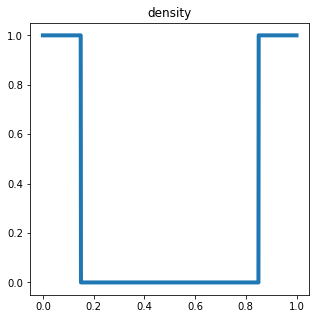

In [213]:
r1d.plot_density(lambda x: r1d.density_drops(x, centroids=[0.5], fill=0.7), size=5)

Two past drops on 0.4 and 0.8, covering 50% of the interval:

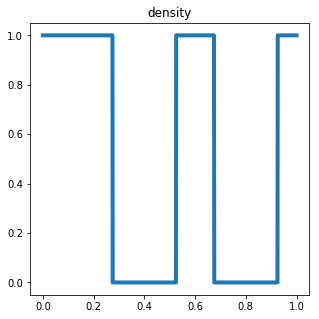

In [184]:
r1d.plot_density(lambda x: r1d.density_drops(x, centroids=[0.4, 0.8], fill=0.5), size=5)

## Dropping drops
The first drop is sampled from uniform distribution on interval [0, 1]. We then iteratively sample a new drop given the resulting distribution

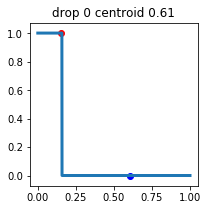

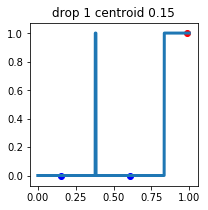

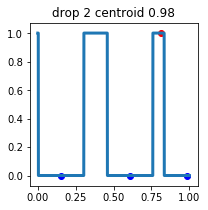

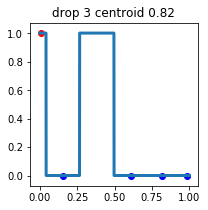

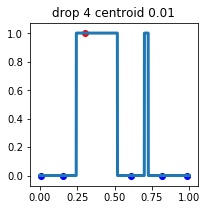

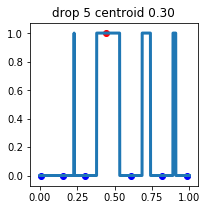

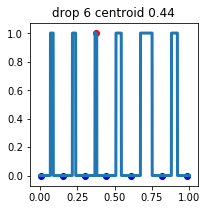

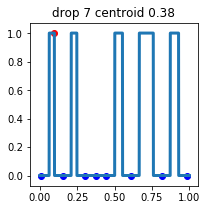

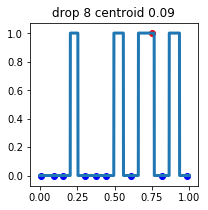

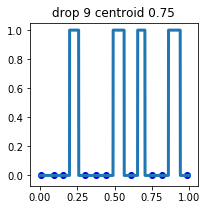

In [214]:
nb_drops = 10
fill = 0.9
centers = []
drop = np.random.sample()
for i in range(nb_drops):
    centers.append(drop)
    #print('drop', i, "centroid=", drop)
    #print("centers=", centers)
    density = lambda x: r1d.density_drops(x, centers, fill=fill)
    if i > 0:
        plt.scatter(x=[drop], y=[1], color='r')
    r1d.plot_density(density, size=3, linewidth=3, title="drop %d centroid %.2f" % (i, drop))
    plt.scatter(x=centers, y=[0]*len(centers), color='b')
    drop = r1d.rejection_sampling(density)

### Final result

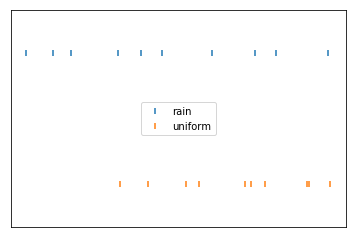

In [216]:
plt.scatter(centers, 0.8 * np.ones(nb_drops), marker='|', label='rain')
plt.scatter(np.random.sample(nb_drops), 0.2 * np.ones(len(centers)), marker='|', label='uniform')
plt.ylim(ymin=0.0, ymax=1.0)
plt.legend(loc='center')
#plt.axis('off');
plt.xticks([])
plt.yticks([]);

Upper part: simulated non independent drops  
Lower part: independent uniformly sampled drops on the same interval

### Bigger sample

In [219]:
nb_drops = 66
drops = r1d.rain(nb_drops, constraint=0.7)

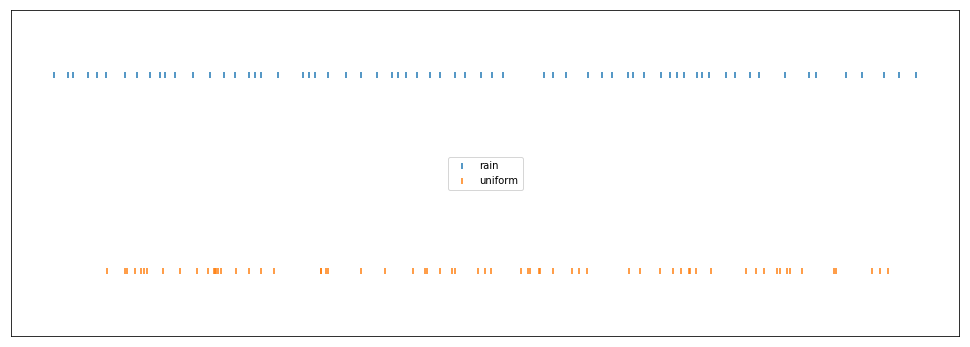

In [220]:
plt.figure(figsize=(17, 6))
plt.scatter(drops, 0.8 * np.ones(nb_drops), marker='|', label='rain')
plt.scatter(np.random.sample(nb_drops), 0.2 * np.ones(nb_drops), marker='|', label='uniform')
plt.ylim(ymin=0.0, ymax=1.0)
plt.legend(loc='center')
#plt.axis('off');
plt.xticks([])
plt.yticks([]);

## Second approach: sampling $n$ drops in one shot

When sampling **i.i.d.** $n$ real numbers with **uniform distribution** on interval $[0,1]$, it can be proven that the distribution of the distance between two consecutive numbers has density:
$$
p_n(x) = n(1-x)^{n-1}
$$

Example of density plots for n = 2, 3 and 10 points:

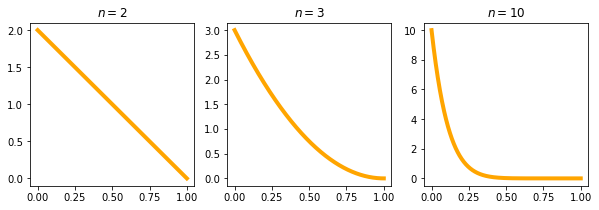

In [264]:
def p(n, x):
    return n*(1-x)**(n-1)

ns = [2, 3, 10]
x = np.linspace(0, 1, 1000)

f, axarr = plt.subplots(1, len(ns), figsize=(10,3))
for i, n in enumerate(ns):
    y = np.vectorize(lambda t: p(n, t))(x)
    axarr[i].plot(x, y, linewidth=4, color='orange')
    axarr[i].set_title('$n=%d$' % n)

You can verify that the mean is $\frac{1}{n+1}$ since $n+1$ is the number of pieces you obtain when cutting the segment with $n$ points.

Note that the distribution is skewed towards 0. Instead of using this distribution we could sample the points considering a distance between them having a triangle distribution with same mean:
(_density plots are not normalized here_)

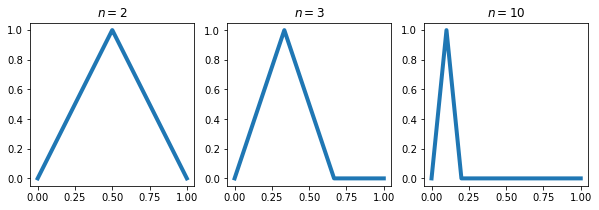

In [255]:
def triangle(x, n):
    return r1d.triangle_density(x, 1/n)

ns = [2, 3, 10]
x = np.linspace(0, 1, 1000)

f, axarr = plt.subplots(1, len(ns), figsize=(10,3))
for i, n in enumerate(ns):
    y = np.vectorize(lambda t: triangle(t, n))(x)
    axarr[i].plot(x, y, linewidth=4)
    axarr[i].set_title('$n=%d$' % n)

In [262]:
n = 100
uniform_rain = np.random.sample(n)
initial = uniform_rain[0]
drops = r1d.rain2(n, initial)

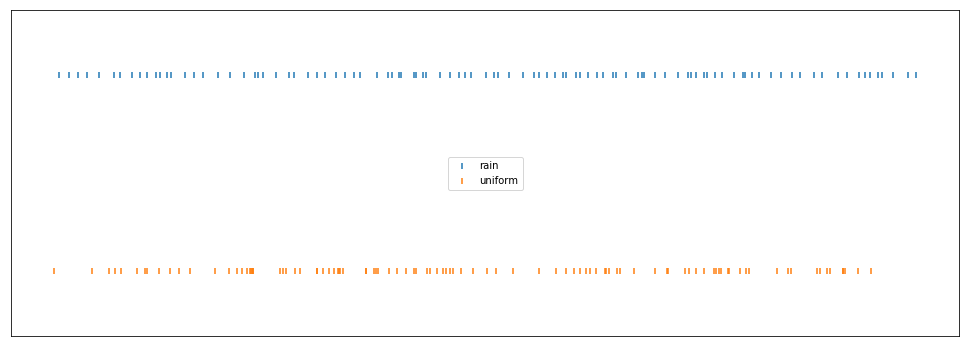

In [263]:
plt.figure(figsize=(17, 6))
plt.scatter(drops, 0.8 * np.ones(n), marker='|', label='rain')
plt.scatter(uniform_rain, 0.2 * np.ones(n), marker='|', label='uniform')
plt.ylim(ymin=0.0, ymax=1.0)
plt.legend(loc='center')
#plt.axis('off');
plt.xticks([])
plt.yticks([]);

Final remark: suppose now that we drop $n$ randoms points i.i.d. uniformily on $[0,n]$ instead of $[0,1]$. We just stretch the segment as the number of drops increases. It correspond to a simple variable substitution $x \rightarrow x/n$ leading to density:
$$
d_n(x) = \Big(1-\frac{x}{n}\Big)^{n-1} \quad x \in [0,n]
$$

When $n$ grows to infinity, the density converges to the exponential:
$$
d_{\infty}(x) = e^{-x} \quad x \in [0,+\infty]
$$
which is characteristic of the distribution of distances between events of a Poisson stochastic process.

# 2d raining model

The following approach does not work, because xs and ys shouldn't be independent.

In [96]:
# nb of drops
n = 200
unif_xs = np.random.sample(n)
unif_ys = np.random.sample(n)
init_x = unif_xs[0]
init_y = unif_ys[0]
rain_xs = r1d.rain2(n, initial=init_x)
rain_ys = r1d.rain2(n, initial=init_y)

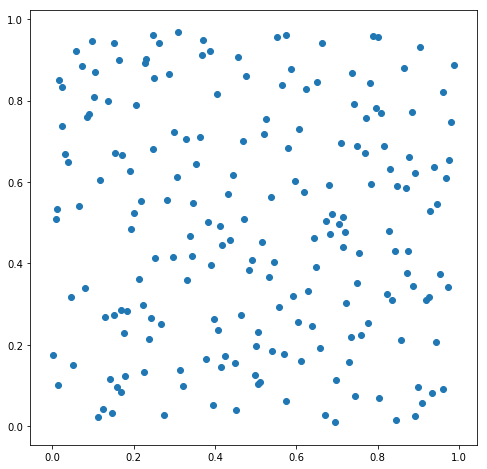

In [97]:
plt.figure(figsize=(8,8))
plt.scatter(rain_xs, rain_ys, marker='o');

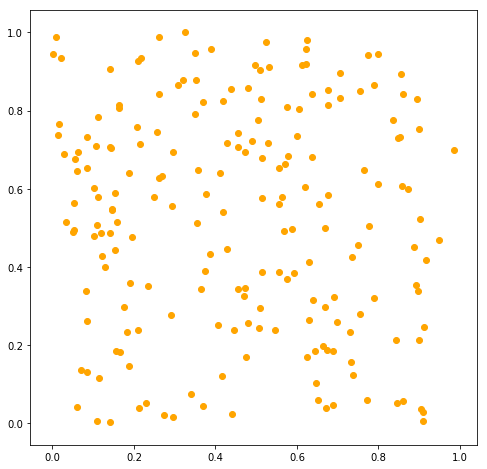

In [98]:
plt.figure(figsize=(8,8))
plt.scatter(unif_xs, unif_ys, marker='o', color='orange');

In [265]:
n = 2
m = 3
n + m

5

In [266]:
n

2